In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from collections import Counter

In [2]:
def read_table(path):
    """Reads table and drops irrelevant columns and rows.
    Returns an analysis ready DataFrame"""
    df = pd.read_table('EMG/'+path)
    df = df[df['class']!=0]
    df = df[df['class']!=7]
    df = df.drop(columns='time')

    # Map the classes so they range from 0-6 for cross entropy loss to work
    mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6}
    df['class'] = df['class'].map(mapping)

    df.reset_index(drop=True,inplace=True)
    return df

In [3]:
df = pd.concat([read_table('1/1_1.txt'), read_table('1/2_1.txt')])
for n in range(2,37):
    path1 = f'{n}/1_{n}.txt'
    df = pd.concat([df, read_table(path1)])
    path2 = f'{n}/2_{n}.txt'
    df = pd.concat([df, read_table(path2)])

df = df.dropna()

df = df.sort_values("class")

df.reset_index(drop=True, inplace=True)

df[df['class'] == 0]

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,0.0
1,-0.00005,-0.00001,-0.00006,0.00001,0.00001,0.00002,-0.00001,0.00001,0.0
2,-0.00005,-0.00001,-0.00006,0.00001,0.00001,0.00002,-0.00001,0.00001,0.0
3,-0.00005,-0.00001,-0.00006,0.00001,0.00001,0.00002,-0.00001,0.00001,0.0
4,-0.00005,-0.00001,-0.00006,0.00001,0.00001,0.00002,-0.00001,0.00001,0.0
...,...,...,...,...,...,...,...,...,...
250050,-0.00002,-0.00003,0.00000,-0.00002,-0.00002,-0.00001,0.00004,0.00001,0.0
250051,-0.00002,-0.00003,0.00000,-0.00002,-0.00002,-0.00001,0.00004,0.00001,0.0
250052,-0.00002,-0.00003,0.00000,-0.00002,-0.00002,-0.00001,0.00004,0.00001,0.0
250053,-0.00002,-0.00003,0.00000,-0.00002,-0.00002,-0.00001,0.00004,0.00001,0.0


In [4]:
df['class'].value_counts()

class
5.0    253009
4.0    251733
3.0    251570
0.0    250055
2.0    249494
1.0    243193
Name: count, dtype: int64

In [5]:
df.drop(df.index[0:5], inplace=True)
df.drop(df.index[250050:250053], inplace=True)
df.drop(df.index[493240:493244], inplace=True)
df.drop(df.index[994300:994303], inplace=True)
df.drop(df.index[1246030:1246039], inplace=True)

df.reset_index(drop=True, inplace=True)


In [6]:
df['class'].value_counts()

class
5.0    253000
4.0    251730
3.0    251570
0.0    250050
2.0    249490
1.0    243190
Name: count, dtype: int64

In [7]:
df['class'].value_counts()

class
5.0    253000
4.0    251730
3.0    251570
0.0    250050
2.0    249490
1.0    243190
Name: count, dtype: int64

In [8]:
X = df.drop(columns=['class'])
y = df['class']

In [9]:
X_train, X_test, y_train, y_test = [], [], [], []


for category in np.unique(y):
    category_mask = (y == category)
    X_category = X[category_mask]
    y_category = y[category_mask]
    
    num_samples = len(y_category)
    train_size = int(num_samples * 0.8)
    train_size -= train_size % 5
    
    X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(
        X_category, y_category, train_size=train_size, random_state=42, stratify=y_category)
    
    X_train.append(X_cat_train)
    X_test.append(X_cat_test)
    y_train.append(y_cat_train)
    y_test.append(y_cat_test)

X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)

# print(f'Train size: {len(y_train)}, Test size: {len(y_test)}')
X_train = pd.DataFrame(X_train, columns=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8'])
X_test = pd.DataFrame(X_test, columns=['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8'])
y_train = pd.DataFrame(y_train, columns=['class'])
y_test = pd.DataFrame(y_test, columns=['class'])


In [10]:
def scaler(df):
    """Normalizes the data, returns a DataFrame with the new scaled numbers"""
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled, columns=df.columns)
    return df_scaled

In [11]:
X_train = scaler(X_train)
X_test = scaler(X_test)

In [12]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,286 (176.90 KB)

 Trainable params: 45,286 (176.90 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=30)

Epoch 1/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 565us/step - accuracy: 0.6452 - loss: 0.9011
Epoch 2/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 22s 552us/step - accuracy: 0.6957 - loss: 0.7717
Epoch 3/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 566us/step - accuracy: 0.7193 - loss: 0.7111
Epoch 4/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 22s 561us/step - accuracy: 0.7418 - loss: 0.6608
Epoch 5/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 22s 547us/step - accuracy: 0.7582 - loss: 0.6231
Epoch 6/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 564us/step - accuracy: 0.7717 - loss: 0.5921
Epoch 7/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 565us/step - accuracy: 0.7815 - loss: 0.5720
Epoch 8/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 576us/step - accuracy: 0.7892 - loss: 0.5544
Epoch 9/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 566us/step - accuracy: 0.7963 - loss: 0.5403
Epoch 10/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 584us/step - accuracy: 0.8020 - loss: 0.5270
Epoch 11/20
39974/39974 ━━━━━━━━━━━━━━━━━━━━ 23s 578us/step - accurac

In [36]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

37476/37476 ━━━━━━━━━━━━━━━━━━━━ 10s 256us/step
9370/9370 ━━━━━━━━━━━━━━━━━━━━ 2s 249us/step


In [45]:
predicted_classes_train = np.argmax(predict_train, axis=1)
predicted_classes_test = np.argmax(predict_test, axis=1)

pred_itter_train = predicted_classes_train.flat
pred_itter_test = predicted_classes_test.flat987

#train data 5
correct = 0
samples = int(len(predicted_classes_train)/5)
for i in range(samples):
    index = i*5
    list = predicted_classes_train[index:index+5]
    counts = Counter(list)
    mf = counts.most_common(1)[0][0]
    if mf == int(y_train['class'].iloc[index]):
        correct += 1

print("Sliding window 5 over train " + f"{(correct/samples)*100:.2f}" + "%")

#test data 5
correct = 0
samples = int(len(predicted_classes_test)/5)
for i in range(samples):
    index = i*5
    list = predicted_classes_test[index:index+5]
    counts = Counter(list)
    mf = counts.most_common(1)[0][0]
    if mf == int(y_test['class'].iloc[index]):
        correct += 1

print("Sliding window 5 over test " + f"{(correct/samples)*100:.2f}" + "%")





#train data 10
correct = 0
samples = int(len(predicted_classes_train)/10)
for i in range(samples):
    index = i*5
    list = predicted_classes_train[index:index+10]
    counts = Counter(list)
    mf = counts.most_common(1)[0][0]
    if mf == int(y_train['class'].iloc[index]):
        correct += 1

print("Sliding window 10 over train " + f"{(correct/samples)*100:.2f}" + "%")

#test data 10
correct = 0
samples = int(len(predicted_classes_test)/10)
for i in range(samples):
    index = i*5
    list = predicted_classes_test[index:index+10]
    counts = Counter(list)
    mf = counts.most_common(1)[0][0]
    if mf == int(y_test['class'].iloc[index]):
        correct += 1

print("Sliding window 10 over test " + f"{(correct/samples)*100:.2f}" + "%")

[0 0 0 ... 5 5 5]
Sliding window 5 over train 97.80%
Sliding window 5 over test 97.38%
Sliding window 10 over train 99.79%
Sliding window 10 over test 99.69%


In [ ]:
model.evaluate(X_test,y_test)

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 3s 278us/step - accuracy: 0.8799 - loss: 0.3473


[0.48811715841293335, 0.8237980008125305]

9370/9370 ━━━━━━━━━━━━━━━━━━━━ 3s 279us/step


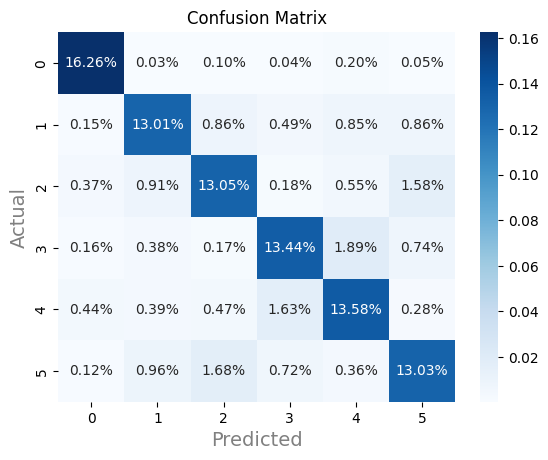

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)


cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%', xticklabels=[f'0', '1', '2', '3', '4', '5'], yticklabels=[f'0', '1', '2', '3', '4', '5'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, color='grey')
plt.ylabel('Actual', fontsize=14, color='grey')
plt.show()